In [1]:
from pathlib import Path
from time import time

input_file = Path('../../AdventOfCode_inputs/AoC-2025-11-input.txt')

rinput = input_file.read_text()

In [2]:
sinput = '''aaa: you hhh
you: bbb ccc
bbb: ddd eee
ccc: ddd eee fff
ddd: ggg
eee: out
fff: out
ggg: out
hhh: ccc fff iii
iii: out
'''

In [3]:
s2input = '''svr: aaa bbb
you: aaa bbb
aaa: fft
fft: ccc
bbb: tty
tty: ccc
ccc: ddd eee
ddd: hub
hub: fff
eee: dac
dac: fff
fff: ggg hhh
ggg: out
hhh: out
'''

In [4]:
ainput = rinput

In [5]:
netw = [s.split() for s in ainput.splitlines()]

**Part One**

In [6]:
import networkx as nx

In [7]:
startTime = time()

G = nx.DiGraph()
G.add_node('out')
for nb in netw:
    G.add_node(nb[0][0:-1])
for nb in netw:
    for i in range(1,len(nb)):
        G.add_edge(nb[0][0:-1], nb[i])
count = 0        
for p in nx.all_simple_paths(G,'you','out'):
    count += 1
ans1 = count

time()-startTime

0.02630758285522461

In [8]:
ans1

688

**Part Two**

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(25.0,20.0)

In [10]:
G = nx.DiGraph()
G.add_node('out')
for nb in netw:
    G.add_node(nb[0][0:-1])
for nb in netw:
    for i in range(1,len(nb)):
        G.add_edge(nb[0][0:-1], nb[i])

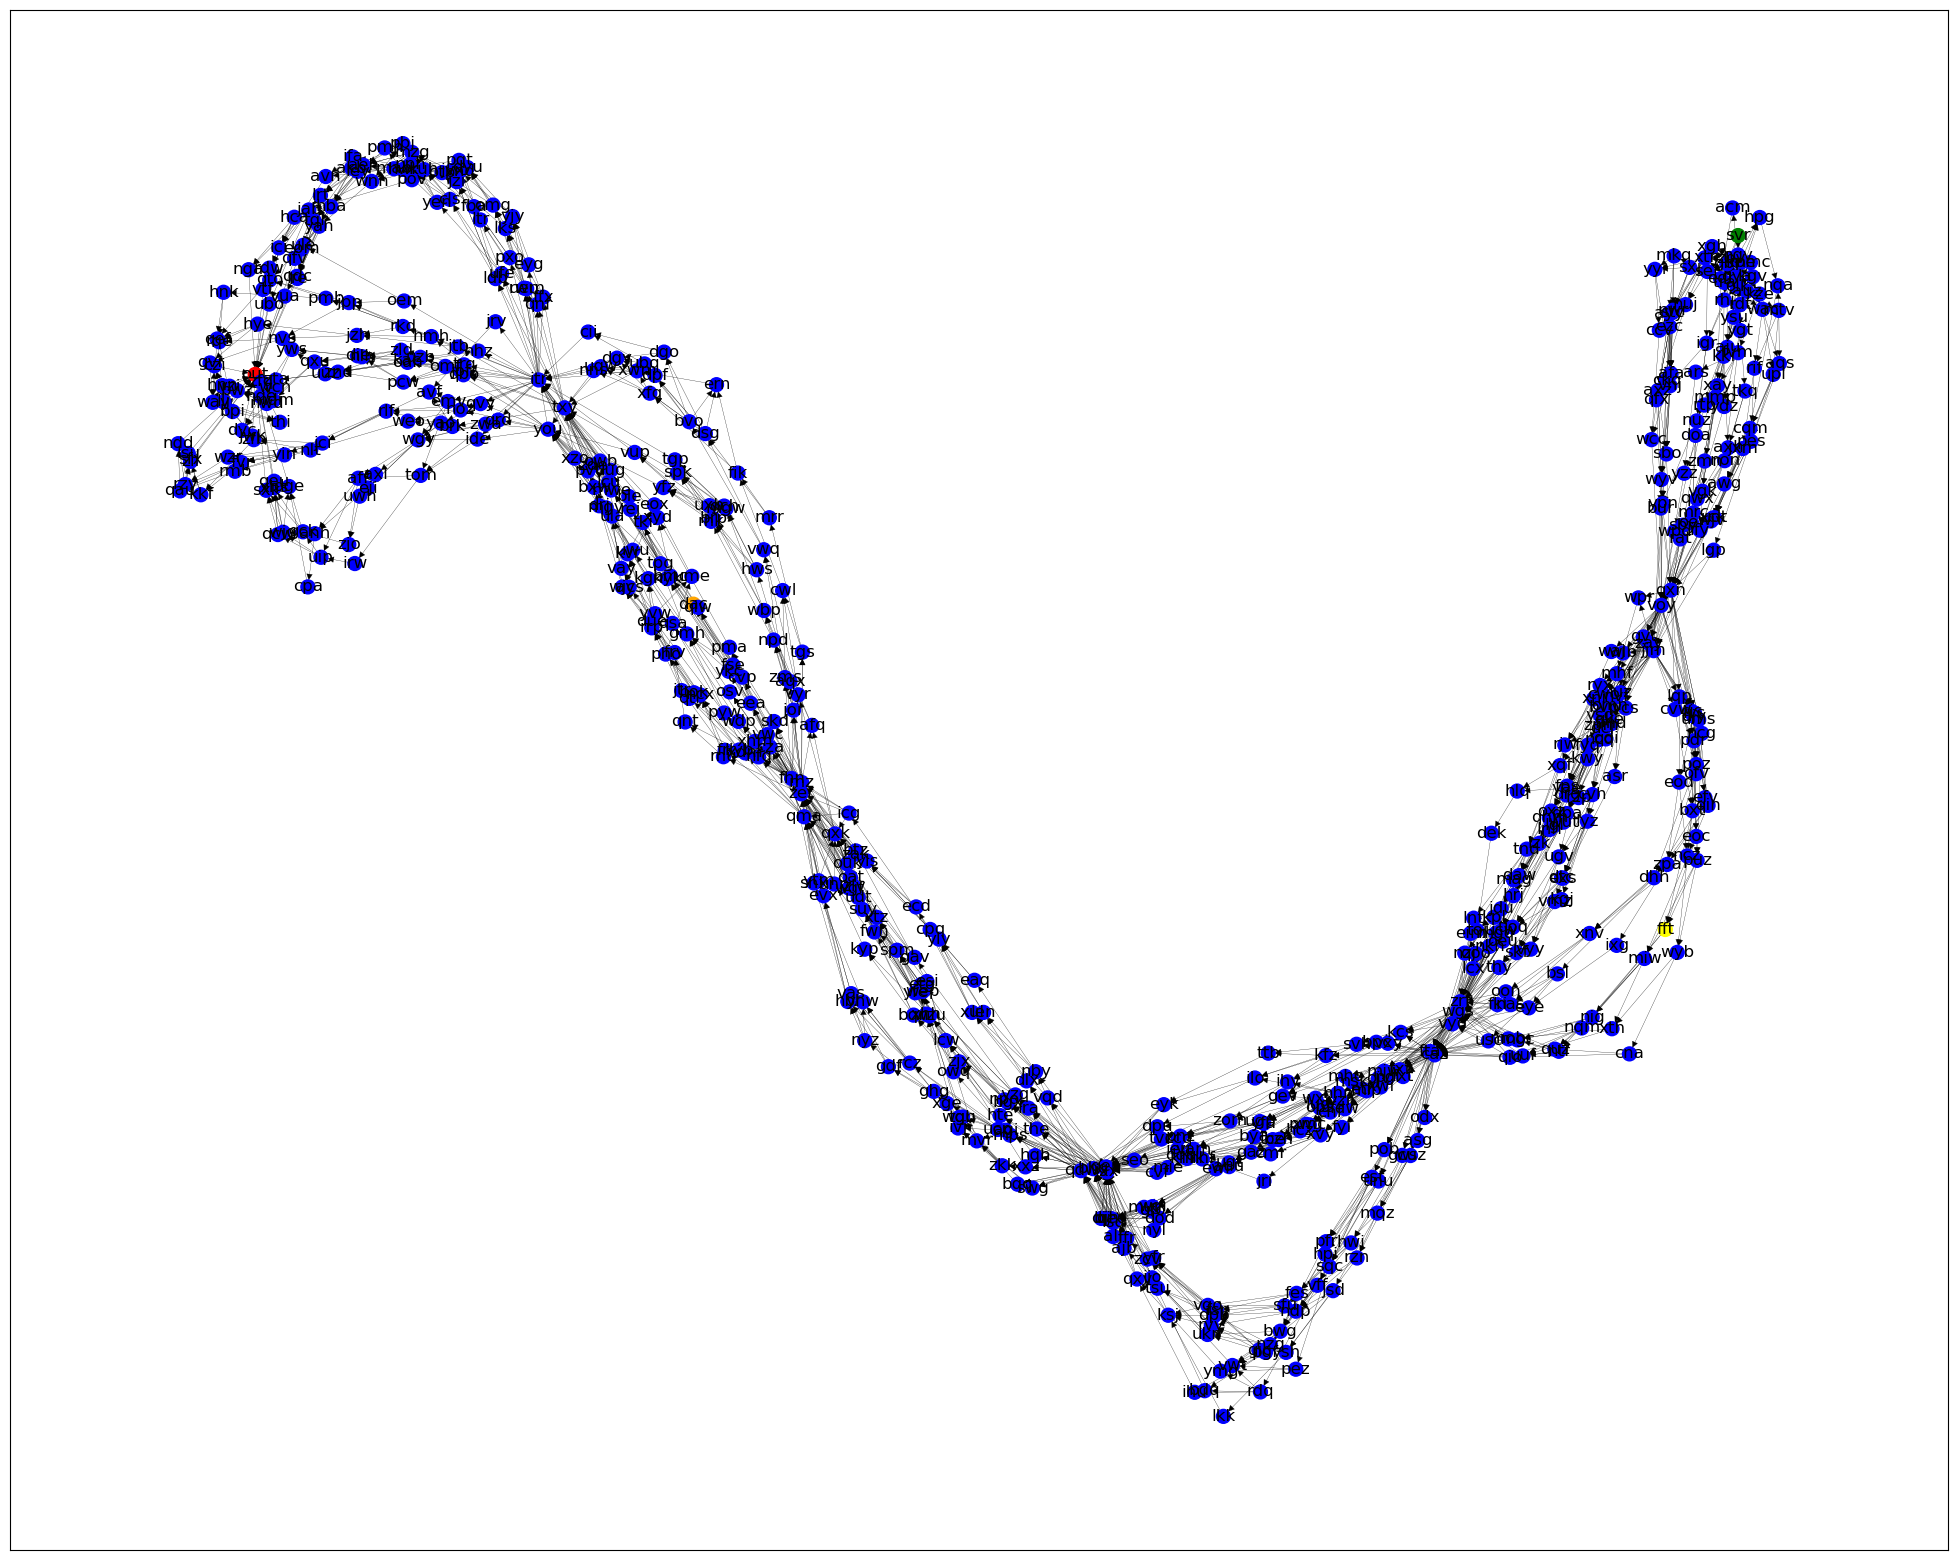

In [11]:
from collections import defaultdict
col = defaultdict(lambda : "blue")
col["svr"] = "green"
col["out"] = "red"
col["fft"] = "yellow"
col["dac"] = "orange"
        
nx.draw_networkx(G, node_color=[col[n] for n in G.nodes()], node_size=100, width=0.2)

In [12]:
# graph is a DAG, so calculate layers so we can see if a DFS has already passed fft or dac
for layer, nodes in enumerate(nx.topological_generations(G)):
    for node in nodes:
        G.nodes[node]["layer"] = layer

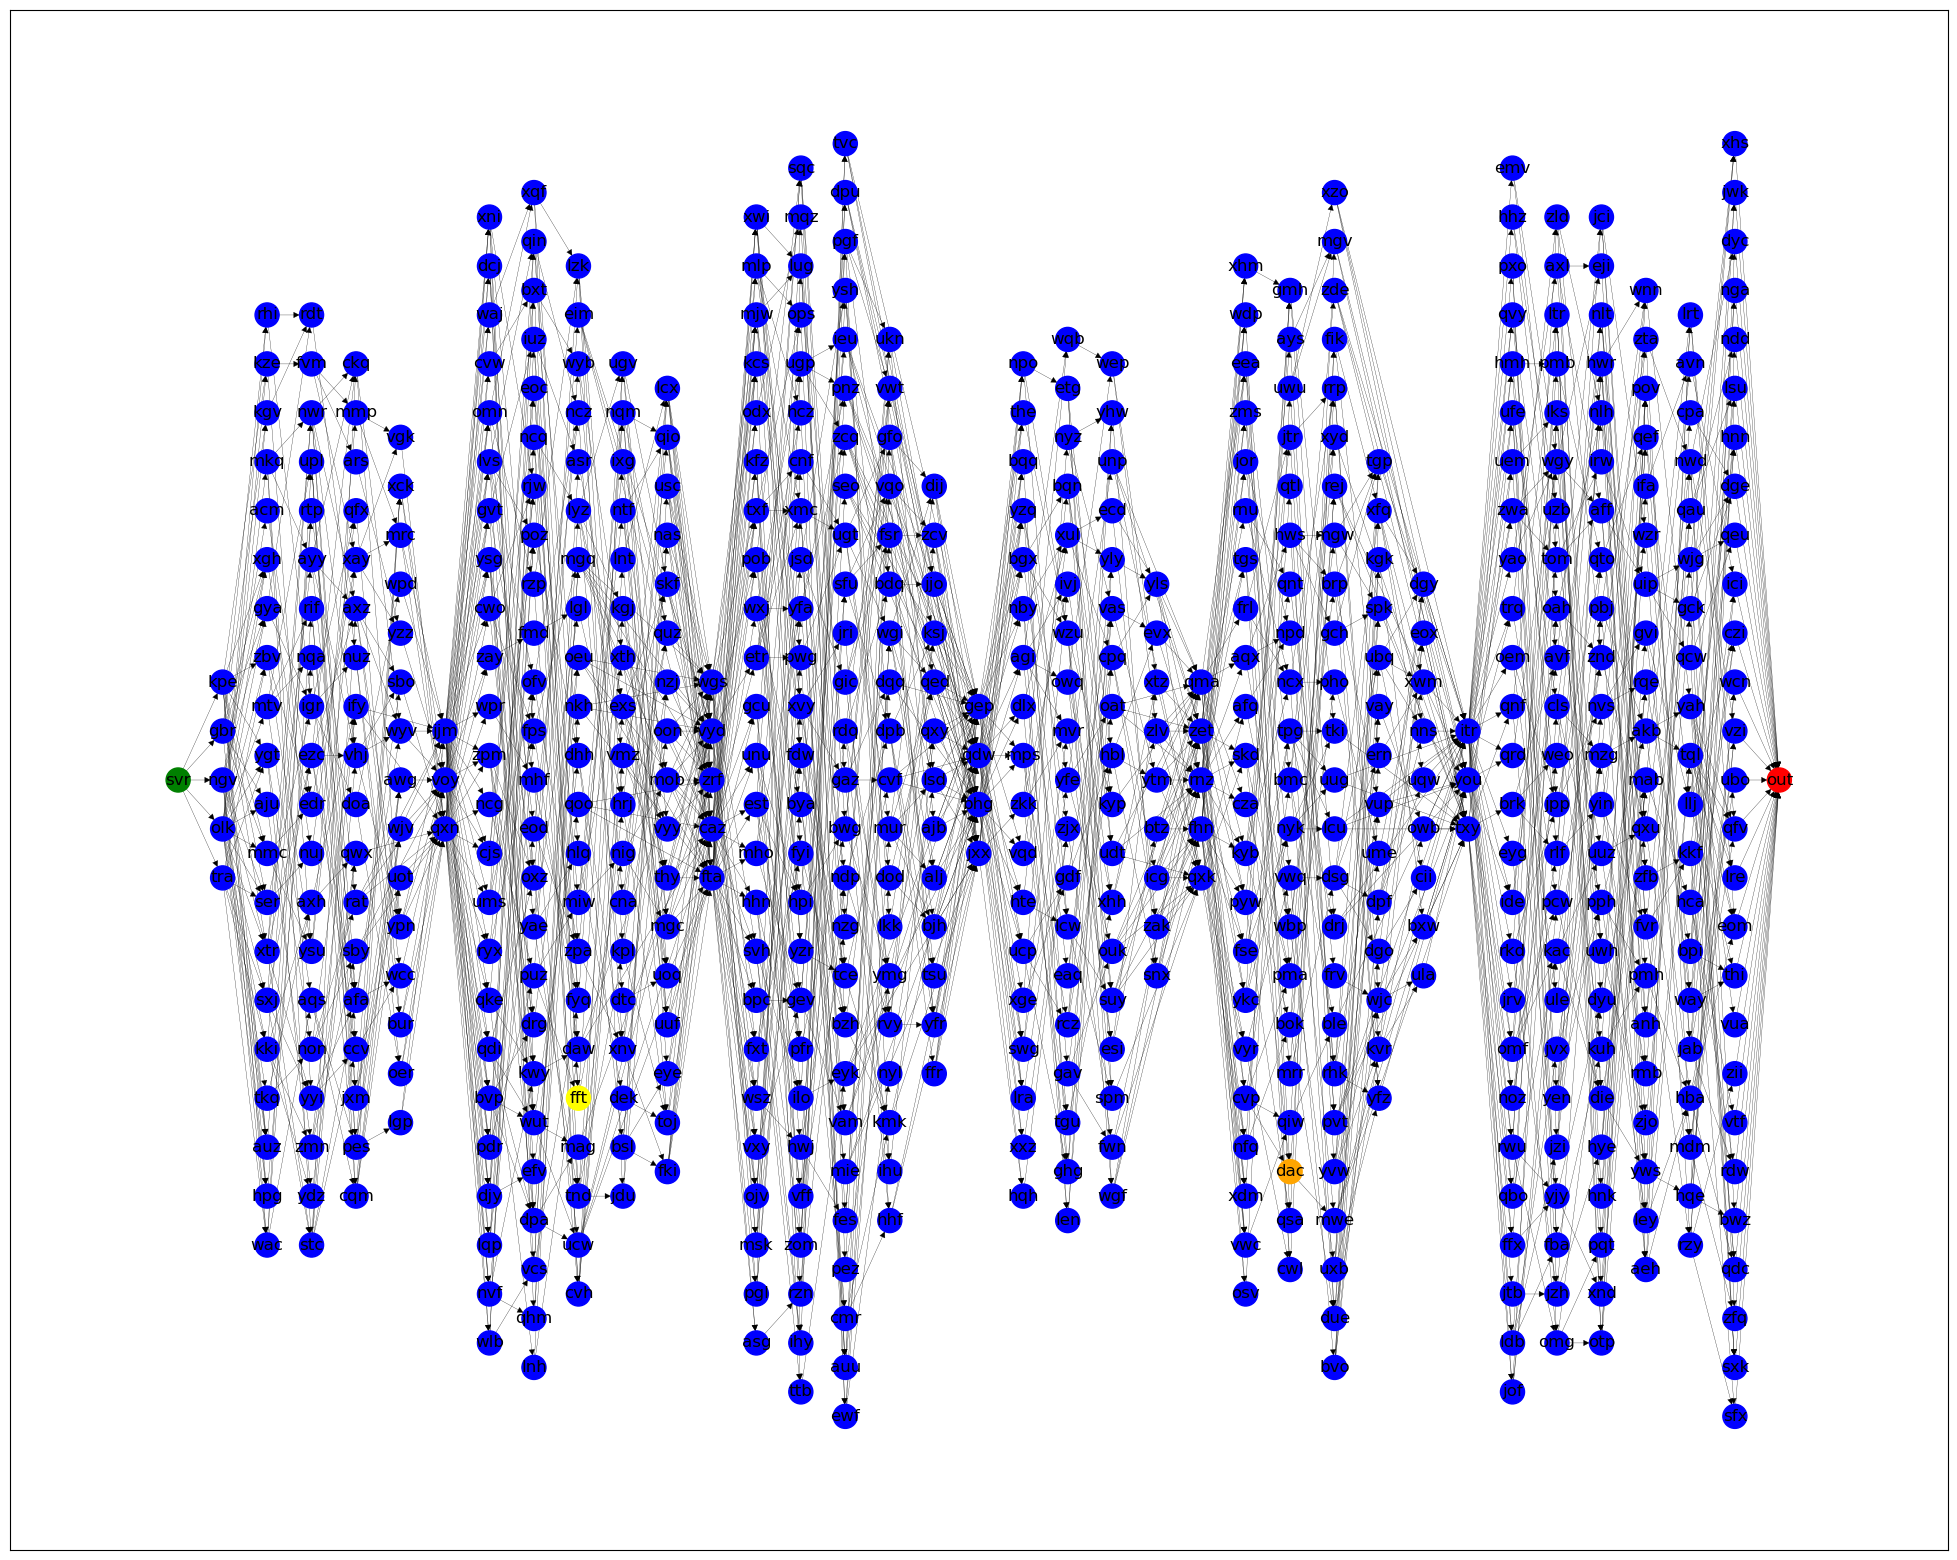

In [13]:
pos = nx.multipartite_layout(G, subset_key="layer")
nx.draw_networkx(G, node_color=[col[n] for n in G.nodes()], pos=pos, width=0.2)

In [14]:
G.nodes["svr"]["layer"], G.nodes["fft"]["layer"], G.nodes["dac"]["layer"],  G.nodes["out"]["layer"]

(0, 9, 25, 36)

In [15]:
# Lots of optimizations, but @cache is doing all the work here
from functools import cache

@cache
def countFrom(start, end, score):
    if start == end:
        if score == 101:
            return 1
        else:
            return 0 # will never happen with pruning
        
    # prune by topological layer 
    if G.nodes[start]["layer"] > G.nodes["fft"]["layer"] and score == 0:
        return 0 # never going to pass fft
    if G.nodes[start]["layer"] > G.nodes["dac"]["layer"] and score < 100:
        return 0 # never going to pass dac
        
    nscore = score
    if start =="fft":
        nscore += 1
    elif start == "dac":
        nscore += 100
        
    count = 0
    for n in G.neighbors(start):
        count += countFrom(n, end, nscore)
        
    return count


In [16]:
# feels clever to calculate number of paths but...
startTime = time() 
ans2 = countFrom("svr", "fft", 101)*countFrom("fft","dac", 100)*countFrom("dac","out",1)
print(time()-startTime, 's')

ans2

0.007142782211303711 s


293263494406608

In [17]:
# ...ultimately just as fast to go directly
countFrom.cache_clear()

startTime = time() 
ans2 = countFrom("svr", "out", 0)
print(time()-startTime, 's')

ans2

0.0030198097229003906 s


293263494406608